In [2]:
from meta_automl.data_preparation.pipeline_features_extractors.fedot_pipeline_features_extractor import FEDOTPipelineFeaturesExtractor
import pickle
import numpy as np
from meta_automl.surrogate.hetero.dataset import HeteroPipelineAndDatasetFeaturesDataset
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from meta_automl.surrogate.hetero.deterministic_graph_embedding import deterministic_graph_embedding


/Users/cherniak/anaconda3/envs/gamlet/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
pipe_extractor = FEDOTPipelineFeaturesExtractor()

/Users/cherniak/anaconda3/envs/gamlet/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(
/Users/cherniak/anaconda3/envs/gamlet/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The identity link alias is deprecated. Use Identity instead. The identity link alias will be removed after the 0.15.0 release.
  warnings.warn(
/Users/cherniak/anaconda3/envs/gamlet/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_power link alias is deprecated. Use InversePower instead. The inverse_power link alias will be removed after the 0.15.0 release.
  warnings.warn(
/Users/cherniak/anaconda3/envs/gamlet/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_squared link alias is deprecated. Use InverseSquared instead. The

In [8]:
with open("/Users/cherniak/itmo_job/GAMLET/data/no_meta_features_and_fedot_pipelines_raw/id2pipeline_path.pickle", "rb") as f:
        id2pipe = pickle.load(f)
with open("/Users/cherniak/itmo_job/GAMLET/data/no_meta_features_and_fedot_pipelines_raw/id2dataset_id.pickle", "rb") as f:
    id2dataset = pickle.load(f)    
    
    
val_dataset = HeteroPipelineAndDatasetFeaturesDataset(
        "/Users/cherniak/itmo_job/GAMLET/data/no_meta_features_and_fedot_pipelines_raw/train_task_pipe_comb.csv",
        "/Users/cherniak/itmo_job/GAMLET/data/no_meta_features_and_fedot_pipelines_raw/datasets.csv",
        id2pipe,
        id2dataset,
        is_val=True,
)
val_dataloader = DataLoader(val_dataset, batch_size=8196, shuffle=False, num_workers=0, collate_fn=val_dataset.collate_fn)

In [9]:
batch = next(iter(val_dataloader))

In [10]:
task_id, _, pipe_json_str, _, y_true = batch

In [11]:
np.unique(task_id.numpy(), return_counts=True)

(array([0]), array([8196]))

In [12]:
to_keep = ~y_true.isinf()
print(to_keep.sum())

pipe_json_str = np.asarray(pipe_json_str)[to_keep]
y_true = y_true[to_keep]

tensor(8186)


In [13]:
to_keep = y_true < -0.94
print(to_keep.sum())

pipe_json_str = np.asarray(pipe_json_str)[to_keep]
y_true = y_true[to_keep]

tensor(7801)


In [14]:
z_pipeline = [deterministic_graph_embedding(p) for p in pipe_json_str]
z_pipeline = np.vstack(z_pipeline).astype(np.float32)

/Users/cherniak/itmo_job/GAMLET/meta_automl/data_preparation/pipeline_features_extractors/fedot_pipeline_features_extractor.py:106: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if parameter_name in operation_parameters:


In [15]:
z_pipeline.shape

(7801, 292)

In [16]:
transformed = TSNE(2, init="pca").fit_transform(z_pipeline)

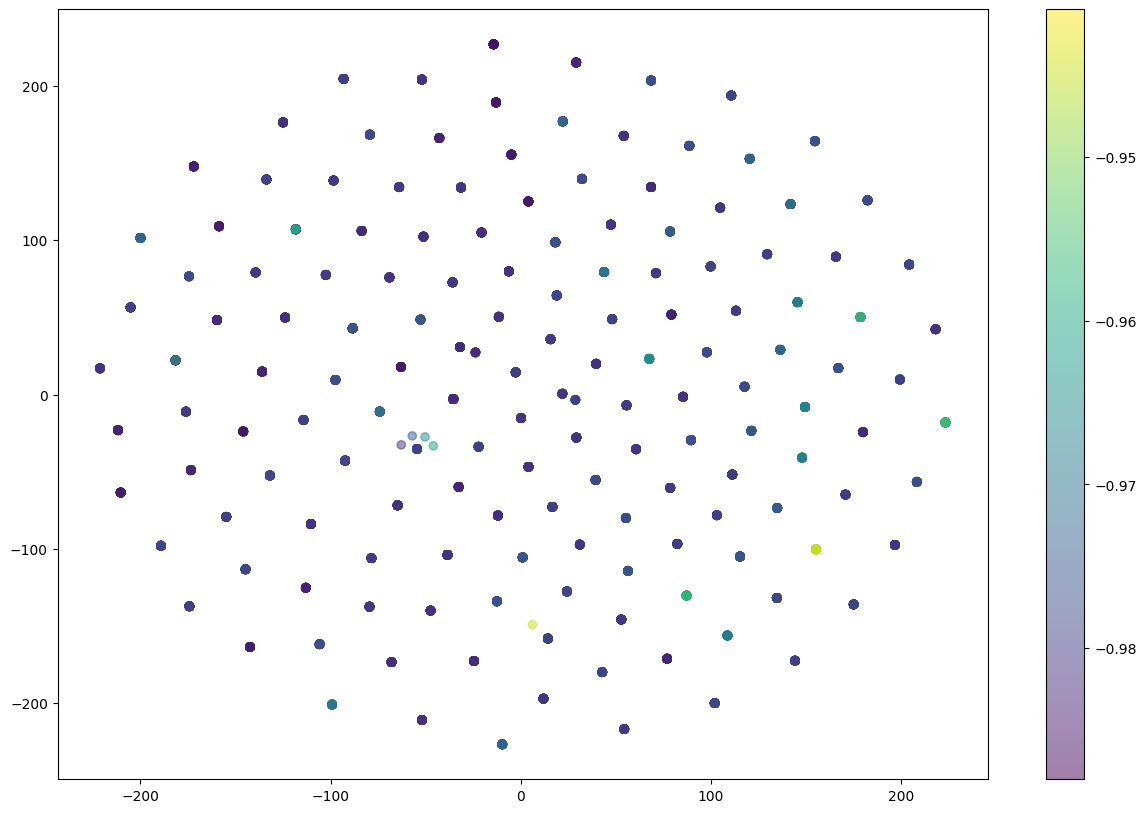

In [17]:
fig = plt.figure(figsize=(15, 10))
img = plt.scatter(*transformed.T, alpha=0.5, c=y_true)
plt.colorbar(img)
plt.show()

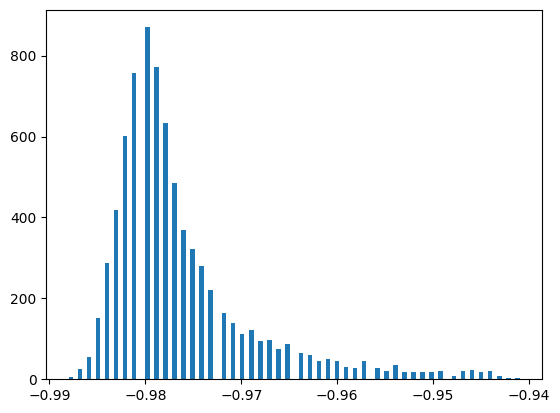

In [18]:
plt.hist(y_true, bins=100)
plt.show()
